# clustering

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [95]:
import platform
import matplotlib
from matplotlib import font_manager, rc

path="c:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [96]:
power_df = pd.read_excel('시도별_용도별.xls')

In [97]:
power_df.shape

(19, 29)

In [98]:
power_df

,구분,area,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,kw,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,gs,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,kk,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,kn,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,kp,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,kj,1954876,565527,3174973,3740500,74608,2898,2910768,161072,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,tk,3151904,826396,5470438,6296834,69142,5858,5862633,212626,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,dj,1872890,954681,3955921,4910602,28643,3326,2608343,204171,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,bs,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,se,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [99]:
power_df = power_df.set_index('area')

In [100]:
power2 = power_df.drop('구분', axis=1)
power2.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
area,,,,,,,,,,,,,,,,,,,,,
kw,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
gs,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kk,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
kn,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
kp,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [20.0, 20.0, 67.5, 67.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [43.75, 43.75, 121.25, 121.25]],
 'dcoord': [[0.0, 1863368.2894999583, 1863368.2894999583, 0.0],
  [0.0, 3694520.3403854743, 3694520.3403854743, 0.0],
  [1863368.2894999583,
   6692622.892742575,
   6692622.892742575,
   3694520.3403854743],
  [0.0, 5947940.638600557, 5947940.638600557, 0.0],
  [0.0, 6836395.025369146, 6836395.025369146, 5947940.638600557],
  [0.0, 4942463.107902678, 4942463.107902678, 0.0],
  [0.0, 6860691.411783855, 6860691.411783855, 4942463.107902678],
  [6836395.025369146, 12947068.8716173, 12947068.8716173, 6860691.411783855],
  [6692622.892742575,
   19653672.127651546,
   196536

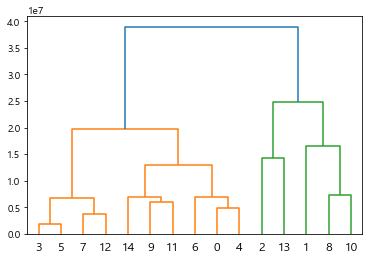

In [101]:
power2 = power2.drop(['gs','sum'])
power3 = power2.drop(['kk','se'])
link_dist = linkage(power3, metric='euclidean', method='centroid')

dendrogram(link_dist)

In [102]:
k = KMeans(n_clusters=3).fit(power3)

In [103]:
k.labels_

array([0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2])

# scaling
- min-max scaling
- standard scaling
- robust scaling

In [104]:
power3_scaled = StandardScaler().fit_transform(power3)

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [60.0, 60.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [75.0, 75.0, 110.0, 110.0],
  [35.0, 35.0, 92.5, 92.5],
  [25.0, 25.0, 63.75, 63.75],
  [15.0, 15.0, 44.375, 44.375],
  [5.0, 5.0, 29.6875, 29.6875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [17.34375, 17.34375, 132.5, 132.5]],
 'dcoord': [[0.0, 2.0007152720335233, 2.0007152720335233, 0.0],
  [0.0, 2.2248818633637346, 2.2248818633637346, 0.0],
  [2.0007152720335233,
   2.566506448621976,
   2.566506448621976,
   2.2248818633637346],
  [0.0, 4.939253066548681, 4.939253066548681, 0.0],
  [2.566506448621976, 5.171267915885001, 5.171267915885001, 4.939253066548681],
  [0.0, 5.203384314860883, 5.203384314860883, 0.0],
  [5.171267915885001, 5.167235863695674, 5.167235863695674, 5.203384314860883],
  [0.0, 5.6261897523642475, 5.6261897523642475, 5.167235863695674],
  [0.0, 5.653528400176

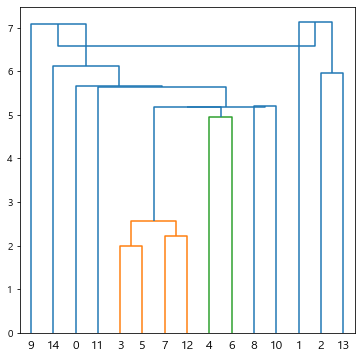

In [105]:
link_dist = linkage(power3_scaled, metric='euclidean', method='centroid')
plt.figure(figsize=(6,6))
dendrogram(link_dist)

In [106]:
power2_scaled = StandardScaler().fit_transform(power2)
k = KMeans(n_clusters=5).fit(power2_scaled)
k.labels_

array([0, 1, 4, 2, 0, 0, 0, 0, 3, 0, 4, 0, 4, 0, 0, 2, 0])

In [107]:
power2.index

Index(['kw', 'kk', 'kn', 'kp', 'kj', 'tk', 'dj', 'bs', 'se', 'sj', 'us', 'ic',
       'cn', 'cb', ' jj', 'chnam', 'chbuk'],
      dtype='object', name='area')

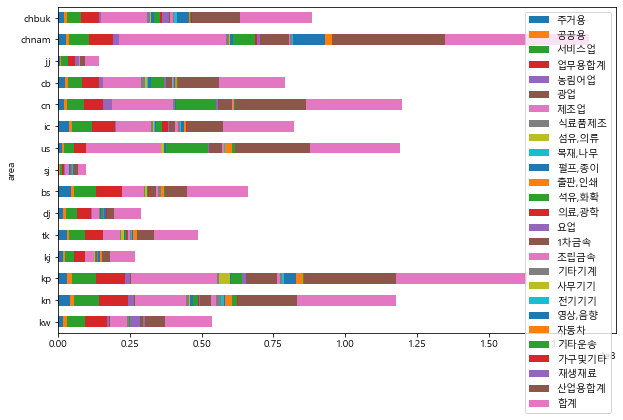

In [108]:
power3.plot(kind='barh', figsize=(10,6), stacked=True)

In [111]:
power3_scaled_df = pd.DataFrame(power3_scaled, columns=power3.columns,
            index=power3.index)

In [113]:
power3_scaled_df

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
area,,,,,,,,,,,,,,,,,,,,,
kw,-0.447461,1.107363,0.393992,0.509603,-0.316151,2.742496,-0.676282,-0.050383,-0.616388,-0.451440,...,-0.828941,-0.656697,-0.830062,-0.527178,-0.976346,-0.336181,-0.556318,-0.886117,-0.640240,-0.480598
kn,1.578961,1.176534,1.498349,1.476078,1.305632,0.008994,0.431200,0.885979,-0.251316,-0.199913,...,2.895248,-0.222754,1.809963,-0.354695,1.289121,3.279342,1.110336,0.677332,0.516082,0.846318
kp,0.741750,1.560268,1.417523,1.464524,0.888898,1.171658,1.539632,-0.003216,3.501870,-0.123130,...,0.661467,0.236074,1.293236,0.926336,1.511864,-0.307656,-0.239826,1.717722,1.542895,1.638853
kj,-0.435282,-1.020610,-0.963503,-0.989374,-0.878909,-0.832773,-0.960380,-0.985356,-0.307126,-0.527273,...,-0.502382,-0.373569,-0.238525,-0.287994,-0.534146,-0.529049,-0.552847,-0.439775,-0.990121,-1.057646
tk,0.610246,-0.355709,0.065323,0.002400,-0.884685,-0.806008,-0.689116,-0.860335,0.525262,-0.469421,...,0.130952,3.389922,-0.406647,-0.453754,0.429803,-0.411663,-0.363103,0.180989,-0.733388,-0.566133
dj,-0.506892,-0.028737,-0.613482,-0.535413,-0.927483,-0.828903,-0.988171,-0.880839,-0.585057,-0.542427,...,-0.743391,-0.590002,-0.694371,-0.375678,-0.860175,-0.528492,-0.430911,-0.927319,-1.020410,-1.003370
bs,1.764586,0.866387,1.011798,1.007704,-0.843699,-0.630305,-0.537491,-0.083553,-0.052856,-0.250080,...,0.903875,-0.449156,-0.622550,-0.510761,0.058538,-0.107861,-0.310237,-0.543843,-0.584696,-0.153945
sj,-1.806555,-1.698213,-2.097244,-2.073897,-0.884340,-0.711008,-1.089755,-1.108696,-0.553430,-0.560746,...,-0.846642,0.225388,-0.843536,-0.482711,-1.014542,-0.538628,-0.607990,-0.914916,-1.111945,-1.480387
us,-0.843818,-1.213457,-0.750871,-0.834672,-0.872977,-0.677199,1.150686,-0.920690,0.400589,-0.493517,...,-0.561629,-0.439116,0.193389,-0.534153,1.523243,1.363437,-0.608978,-0.949440,1.011544,0.623539


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


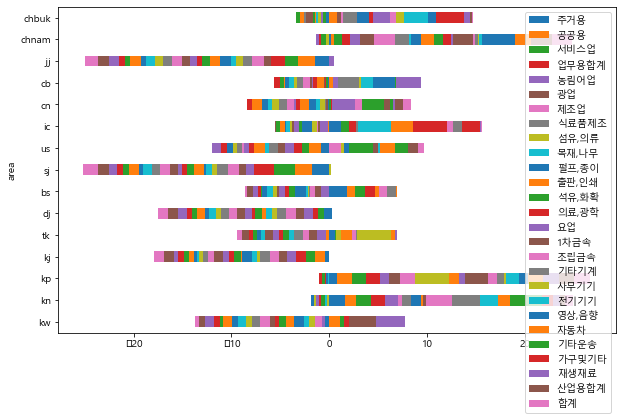

In [112]:
power3_scaled_df.plot(kind='barh', figsize=(10,6), stacked=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


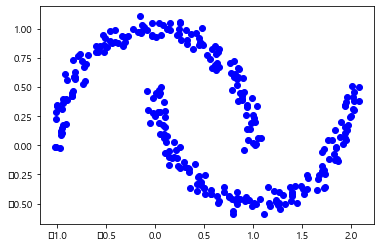

In [114]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1], c='b')

In [116]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


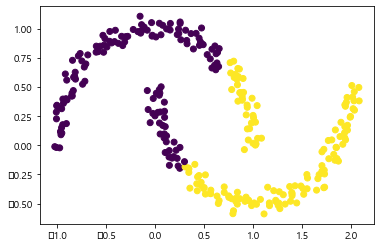

In [117]:
plt.scatter(X[:,0], X[:,1], c=predict)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


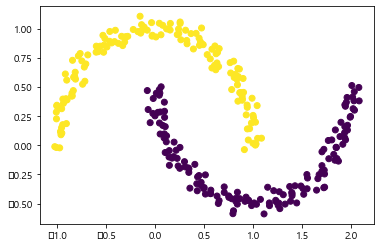

In [123]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=predict)